<table style="background-color:#E6A8D7; width:100%; font-size:24px; color:#8B0000;">
  <tr>
    <td style="text-align:center;"><b>Heart Attack Prediction + EDA</b></td>
  </tr>
</table>

<div style="text-align:center;">
  <img src="https://www.bhf.org.uk/-/media/images/what-we-do/research/research-successes/artificial_heart_770x510-ss-no-exp.jpg?rev=abcddc5809d64a079d4b5cd83764052c" style="display:inline-block; margin:auto;">
</div>



# **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# **Import Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **About this dataset**


This dataset contains information about various factors that may contribute to the likelihood of a heart attack. The following features are included:

- **Age**: Age of the patient
- **Sex**: Sex of the patient (0 = female, 1 = male)
- **exang**: Exercise induced angina (1 = yes, 0 = no)
- **ca**: Number of major vessels (0-3)
- **cp**: Chest pain type
  - 1: Typical angina
  - 2: Atypical angina
  - 3: Non-anginal pain
  - 4: Asymptomatic
- **trtbps**: Resting blood pressure (in mm Hg)
- **chol**: Cholesterol level in mg/dl fetched via BMI sensor
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **rest_ecg**: Resting electrocardiographic results
  - 0: Normal
  - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach**: Maximum heart rate achieved
- **target**: Target variable indicating the likelihood of a heart attack
  - 0: Less chance of heart attack
  - 1: More chance of heart attack


# **Basic Checks**

In [3]:
# top 5 rows in dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# bottom 5 rows in the dataset
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# shape of the dataset
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# **Data Preprocessing**

In [9]:
# renaming columns for better undestanding
df.rename(columns={"cp":"chest_pain","trtbps":"resting_blood_presure","chol":"cholestoral","fbs":"fasting_blood_sugar","restecg":"resting_electrocardiographic_results","thalachh":"maximum_heart_rate","exng":"exercise_induced_angina","slp":"slope","caa":"number_of_colored_vessels","thall":"thalassemia"},inplace=True)

In [10]:
# checking for null values
df.isnull().sum()

age                                     0
sex                                     0
chest_pain                              0
resting_blood_presure                   0
cholestoral                             0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate                      0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_colored_vessels               0
thalassemia                             0
output                                  0
dtype: int64

In [11]:
# checking the duplicates values
df.duplicated().sum()

1

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum()

age                                     0
sex                                     0
chest_pain                              0
resting_blood_presure                   0
cholestoral                             0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate                      0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_colored_vessels               0
thalassemia                             0
output                                  0
dtype: int64

In [14]:
df.head()

,age,sex,chest_pain,resting_blood_presure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_colored_vessels,thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# resting_blood_presure

df['resting_blood_presure'].value_counts()

resting_blood_presure
120    37
130    36
140    32
110    19
150    17
128    12
138    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64

In [16]:
# define threshold for the high blood pressure

high_threshold_systolic = 130

# function to categorize for high systolic blood pressure

def categorize_blood_pressure(row):
    if row['resting_blood_presure'] < high_threshold_systolic:
        return 'Normal'
    else:
        return 'High'
    
# create a new column 'blood_pressure_category' using the categorize_blood_pressure function
df['resting_blood_presure'] = df.apply(categorize_blood_pressure, axis=1)


/tmp/ipykernel_18/2973403444.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resting_blood_presure'] = df.apply(categorize_blood_pressure, axis=1)


In [17]:
df.head()

,age,sex,chest_pain,resting_blood_presure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_colored_vessels,thalassemia,output
0,63,1,3,High,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,High,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,High,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,Normal,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,Normal,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# cholestoral

df['cholestoral'].value_counts

<bound method IndexOpsMixin.value_counts of 0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: cholestoral, Length: 302, dtype: int64>

In [19]:
# define the  threshold for high, normal, and low cholestrol levels

high_threshold = 240
normal_threshold_low = 200
normal_threshold_high = 239

# function to categorize cholestrol levels

def categorize_cholestrol(row):
    if row['cholestoral'] >= high_threshold:
        return 'High'
    elif normal_threshold_low <= row['cholestoral'] <= normal_threshold_high:
        return 'Normal'
    else:
        return 'Low'
    
    
df['cholestoral'] = df.apply(categorize_cholestrol, axis=1)   

/tmp/ipykernel_18/2436805058.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cholestoral'] = df.apply(categorize_cholestrol, axis=1)


In [20]:
df.head()

,age,sex,chest_pain,resting_blood_presure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_colored_vessels,thalassemia,output
0,63,1,3,High,Normal,1,0,150,0,2.3,0,0,1,1
1,37,1,2,High,High,0,1,187,0,3.5,0,0,2,1
2,41,0,1,High,Normal,0,0,172,0,1.4,2,0,2,1
3,56,1,1,Normal,Normal,0,1,178,0,0.8,2,0,2,1
4,57,0,0,Normal,High,0,1,163,1,0.6,2,0,2,1


In [21]:
# maximum_heart_rate

df['maximum_heart_rate'].value_counts()

maximum_heart_rate
162    11
160     9
163     9
152     8
125     7
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [22]:
# define the thresholds for low, normal and high maximum heart rate 

low_thre = 100
normal_thr_low = 100
normal_thr_high = 150


# function for categorize maximum heart rate

def categorize_max_heart_rate(row):
    if row['maximum_heart_rate'] < low_thre:
        return 'Low'
    elif normal_thr_low <= row['maximum_heart_rate'] <= normal_thr_low:
        return 'Normal'
    else:
        return 'High'
    
df['maximum_heart_rate'] = df.apply(categorize_max_heart_rate,axis=1)


/tmp/ipykernel_18/2049848785.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maximum_heart_rate'] = df.apply(categorize_max_heart_rate,axis=1)


In [23]:
df.head()

,age,sex,chest_pain,resting_blood_presure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_colored_vessels,thalassemia,output
0,63,1,3,High,Normal,1,0,High,0,2.3,0,0,1,1
1,37,1,2,High,High,0,1,High,0,3.5,0,0,2,1
2,41,0,1,High,Normal,0,0,High,0,1.4,2,0,2,1
3,56,1,1,Normal,Normal,0,1,High,0,0.8,2,0,2,1
4,57,0,0,Normal,High,0,1,High,1,0.6,2,0,2,1


# **EDA**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

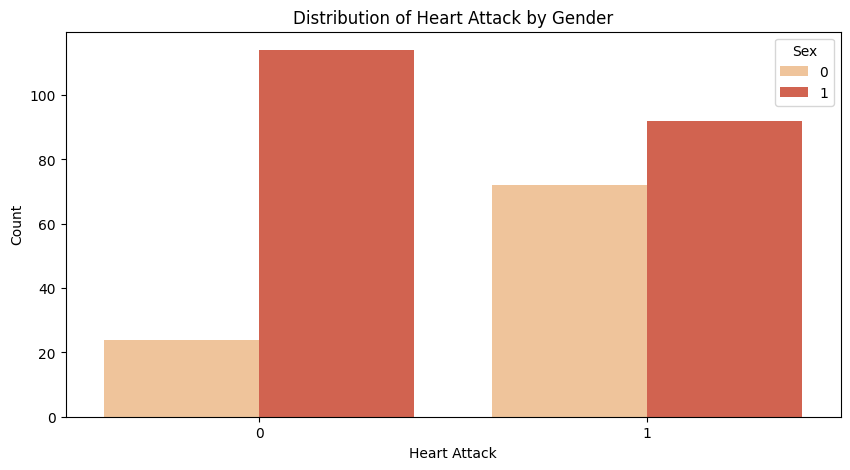

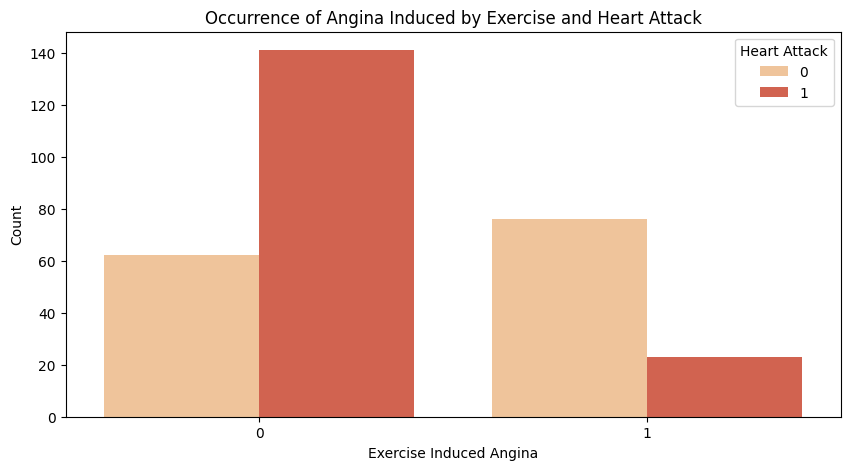

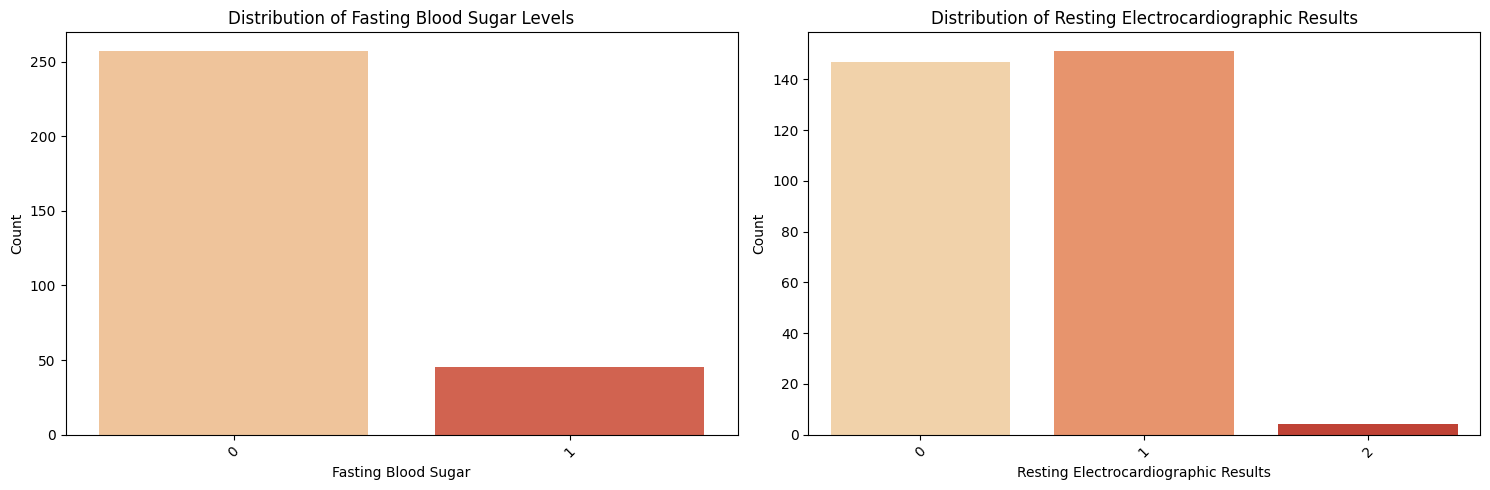

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='output', palette="OrRd", hue='sex')
plt.title("Distribution of Heart Attack by Gender")
plt.xlabel("Heart Attack")
plt.ylabel("Count")
plt.legend(title='Sex')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='exercise_induced_angina', palette="OrRd", hue='output')
plt.title("Occurrence of Angina Induced by Exercise and Heart Attack")
plt.xlabel("Exercise Induced Angina")
plt.ylabel("Count")
plt.legend(title='Heart Attack')
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x="fasting_blood_sugar", palette="OrRd")
plt.title("Distribution of Fasting Blood Sugar Levels")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="resting_electrocardiographic_results", palette="OrRd")
plt.title("Distribution of Resting Electrocardiographic Results")
plt.xlabel("Resting Electrocardiographic Results")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

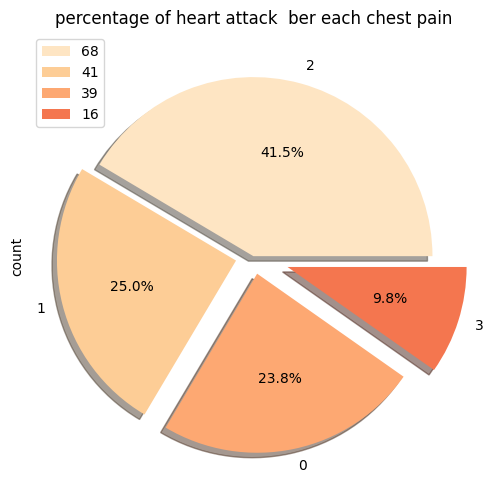

In [26]:
plt.figure(figsize=(10,5))

df["chest_pain"][df["output"]==1].value_counts().plot(kind='pie', autopct='%0.1f%%',explode=[0,0.1,0.1,0.2], shadow=True, colors=sns.color_palette("OrRd"))
plt.legend(labels=df["chest_pain"][df["output"]==1].value_counts(),loc=2)
plt.title("percentage of heart attack  ber each chest pain")
plt.tight_layout()

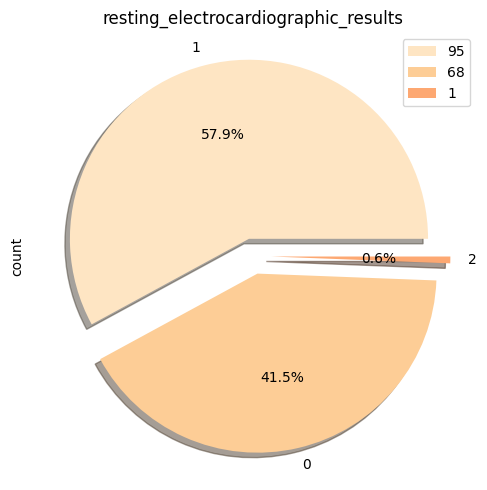

In [27]:
plt.figure(figsize=(10,5))
df["resting_electrocardiographic_results"][df["output"]==1].value_counts().plot(kind='pie', autopct='%0.1f%%',explode=[0.1,0.1,0.1], shadow=True, colors=sns.color_palette("OrRd"))
plt.legend(labels=df["resting_electrocardiographic_results"][df["output"]==1].value_counts(),loc=1)
plt.title("resting_electrocardiographic_results")
plt.tight_layout()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


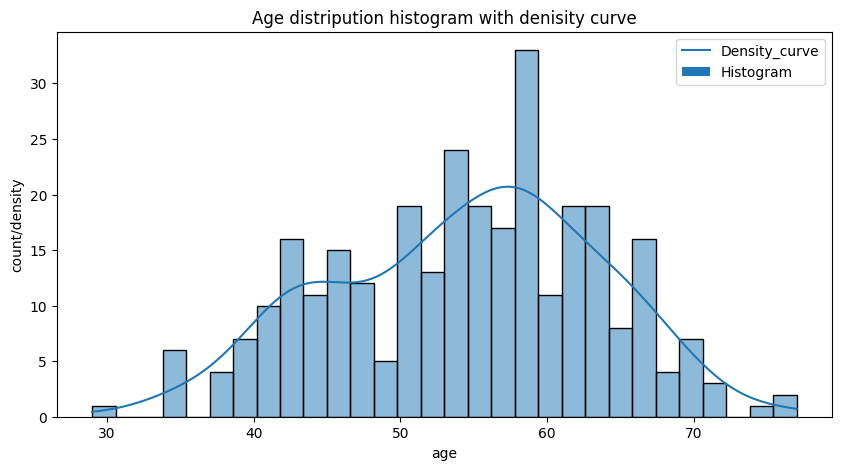

In [28]:
fig,ax=plt.subplots(figsize=(10,5))

sns.histplot(df["age"],bins=30,kde=True,ax=ax)

ax.set_xlabel ("age")
ax.set_ylabel ("count/density")
ax.set_title  ("Age distripution histogram with denisity curve")
ax.legend(["Density_curve","Histogram"])

plt.show()

In [29]:
df

,age,sex,chest_pain,resting_blood_presure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_colored_vessels,thalassemia,output
0,63,1,3,High,Normal,1,0,High,0,2.3,0,0,1,1
1,37,1,2,High,High,0,1,High,0,3.5,0,0,2,1
2,41,0,1,High,Normal,0,0,High,0,1.4,2,0,2,1
3,56,1,1,Normal,Normal,0,1,High,0,0.8,2,0,2,1
4,57,0,0,Normal,High,0,1,High,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,High,High,0,1,High,1,0.2,1,0,3,0
299,45,1,3,Normal,High,0,1,High,0,1.2,1,0,3,0
300,68,1,0,High,Low,1,1,High,0,3.4,1,2,3,0
301,57,1,0,High,Low,0,1,High,1,1.2,1,1,3,0


# **Split Data into X and y**

In [30]:
X = df.drop('output', axis=1)
y = df['output']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
                                                    

In [32]:
X_train.head()

,age,sex,chest_pain,resting_blood_presure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_colored_vessels,thalassemia
132,42,1,1,Normal,High,0,1,High,0,0.0,2,0,2
203,68,1,2,High,High,1,0,High,1,1.6,1,0,3
197,67,1,0,Normal,High,1,1,High,0,0.2,1,2,3
75,55,0,1,High,High,0,0,High,0,1.4,1,0,2
177,64,1,2,High,High,0,1,High,0,0.0,2,0,2


In [33]:
X_test.shape

(61, 13)

# **Feature Engineering**

## 1. Feature Encoding 

In [34]:
X_train

,age,sex,chest_pain,resting_blood_presure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate,exercise_induced_angina,oldpeak,slope,number_of_colored_vessels,thalassemia
132,42,1,1,Normal,High,0,1,High,0,0.0,2,0,2
203,68,1,2,High,High,1,0,High,1,1.6,1,0,3
197,67,1,0,Normal,High,1,1,High,0,0.2,1,2,3
75,55,0,1,High,High,0,0,High,0,1.4,1,0,2
177,64,1,2,High,High,0,1,High,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,41,1,0,Normal,Low,0,0,High,0,0.0,2,0,3
71,51,1,2,Normal,Normal,0,1,High,1,0.0,2,1,3
106,69,1,3,High,Normal,1,0,High,0,0.1,1,1,2
271,61,1,3,High,Normal,0,1,High,0,2.6,1,2,2


In [35]:
from sklearn.compose import ColumnTransformer

In [36]:
from sklearn.preprocessing import OrdinalEncoder

# Define the categories for each ordinal feature
categories = [["Low", "Normal", "High"],  # categories for resting_blood_pressure
              ["Low", "Normal", "High"],  # categories for cholesterol
              ["Low", "Normal", "High"]]  # categories for maximum_heart_rate

transformer = ColumnTransformer(
    [
        ("ordinal", OrdinalEncoder(categories=categories), ["resting_blood_presure", "cholestoral", "maximum_heart_rate"]),
    ],
    remainder='passthrough'
)

In [37]:
# setting to get a pandas df
transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(categories=[['Low', 'Normal',
                                                             'High'],
                                                            ['Low', 'Normal',
                                                             'High'],
                                                            ['Low', 'Normal',
                                                             'High']]),
                                 ['resting_blood_presure', 'cholestoral',
                                  'maximum_heart_rate'])])

In [38]:
X_train_trans = transformer.fit_transform(X_train)

In [39]:
X_test_trans = transformer.fit_transform(X_test)

## 2. Feature Selection

In [40]:
X_train_trans

,ordinal__resting_blood_presure,ordinal__cholestoral,ordinal__maximum_heart_rate,remainder__age,remainder__sex,remainder__chest_pain,remainder__fasting_blood_sugar,remainder__resting_electrocardiographic_results,remainder__exercise_induced_angina,remainder__oldpeak,remainder__slope,remainder__number_of_colored_vessels,remainder__thalassemia
132,1.0,2.0,2.0,42,1,1,0,1,0,0.0,2,0,2
203,2.0,2.0,2.0,68,1,2,1,0,1,1.6,1,0,3
197,1.0,2.0,2.0,67,1,0,1,1,0,0.2,1,2,3
75,2.0,2.0,2.0,55,0,1,0,0,0,1.4,1,0,2
177,2.0,2.0,2.0,64,1,2,0,1,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1.0,0.0,2.0,41,1,0,0,0,0,0.0,2,0,3
71,1.0,1.0,2.0,51,1,2,0,1,1,0.0,2,1,3
106,2.0,1.0,2.0,69,1,3,1,0,0,0.1,1,1,2
271,2.0,1.0,2.0,61,1,3,0,1,0,2.6,1,2,2


In [41]:
X_train_trans.corr()

,ordinal__resting_blood_presure,ordinal__cholestoral,ordinal__maximum_heart_rate,remainder__age,remainder__sex,remainder__chest_pain,remainder__fasting_blood_sugar,remainder__resting_electrocardiographic_results,remainder__exercise_induced_angina,remainder__oldpeak,remainder__slope,remainder__number_of_colored_vessels,remainder__thalassemia
ordinal__resting_blood_presure,1.000000,0.166480,0.018015,0.196868,-0.127845,0.048429,0.177381,-0.135357,-0.010708,0.109354,-0.008291,0.067299,-0.033366
ordinal__cholestoral,0.166480,1.000000,0.000589,0.198983,-0.090115,-0.037400,0.069152,-0.163144,0.077773,0.001174,0.021803,0.014344,0.053920
ordinal__maximum_heart_rate,0.018015,0.000589,1.000000,-0.077788,-0.005102,0.051478,-0.094437,-0.092107,-0.068536,-0.029344,0.065462,-0.107415,-0.047516
remainder__age,0.196868,0.198983,-0.077788,1.000000,-0.101354,-0.072230,0.100173,-0.122231,0.106195,0.193362,-0.147495,0.307871,0.076278
remainder__sex,-0.127845,-0.090115,-0.005102,-0.101354,1.000000,-0.033664,0.055262,-0.061186,0.103164,0.095969,-0.016456,0.145780,0.222997
remainder__chest_pain,0.048429,-0.037400,0.051478,-0.072230,-0.033664,1.000000,0.141818,0.015091,-0.366549,-0.146829,0.125735,-0.167186,-0.196112
remainder__fasting_blood_sugar,0.177381,0.069152,-0.094437,0.100173,0.055262,0.141818,1.000000,-0.111887,0.034781,-0.023839,-0.066143,0.167720,-0.007358
remainder__resting_electrocardiographic_results,-0.135357,-0.163144,-0.092107,-0.122231,-0.061186,0.015091,-0.111887,1.000000,-0.058937,0.003701,0.042552,-0.114069,-0.001366
remainder__exercise_induced_angina,-0.010708,0.077773,-0.068536,0.106195,0.103164,-0.366549,0.034781,-0.058937,1.000000,0.275395,-0.242739,0.100350,0.203635
remainder__oldpeak,0.109354,0.001174,-0.029344,0.193362,0.095969,-0.146829,-0.023839,0.003701,0.275395,1.000000,-0.571501,0.239381,0.191494


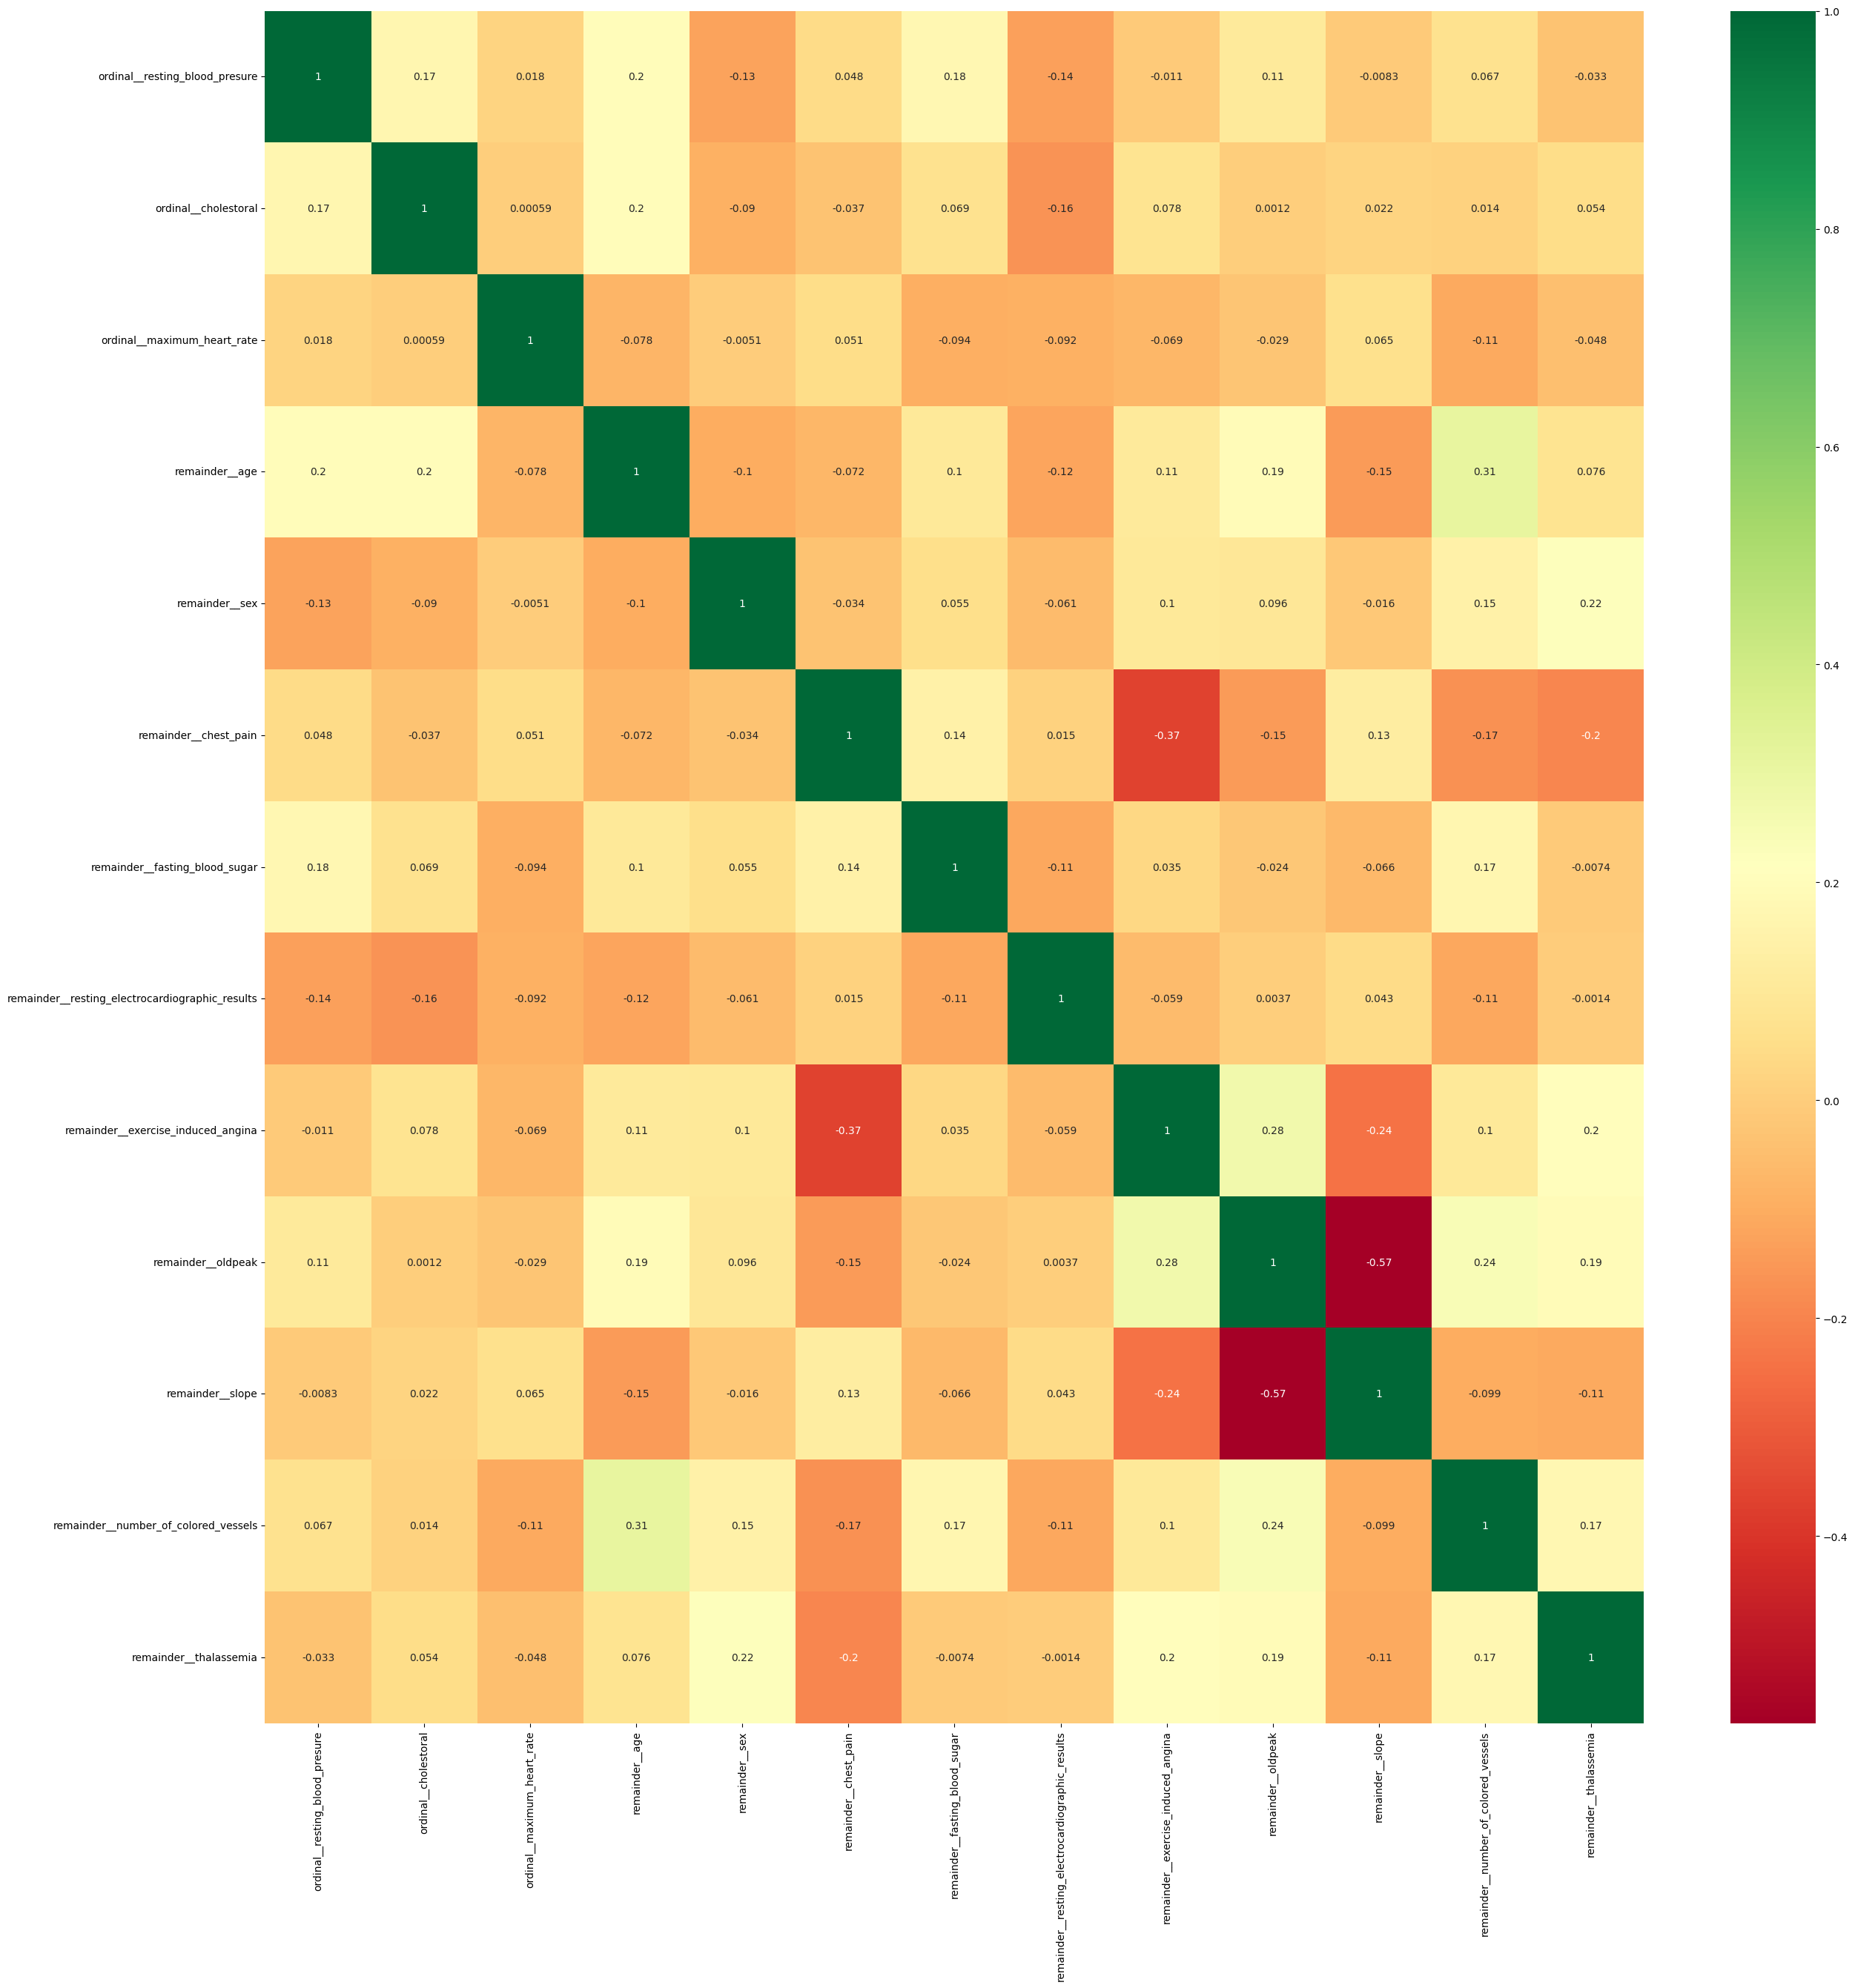

In [42]:
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train_trans.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [44]:
corr_features = correlation(X_train_trans, 0.7)
len(set(corr_features))

0

In [45]:
X_train_trans.shape

(241, 13)

In [46]:
y_train

132    1
203    0
197    0
75     1
177    0
      ..
189    0
71     1
106    1
271    0
102    1
Name: output, Length: 241, dtype: int64

# **Model Building**